In [1]:
import pandas as pd

In [69]:
article_df = pd.read_csv('Main_Dataset1.csv')


In [30]:
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 5.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.4 MB/s  0:00:00 eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Batches: 100%|██████████| 123/123 [00:11<00:00, 10.86it/s]


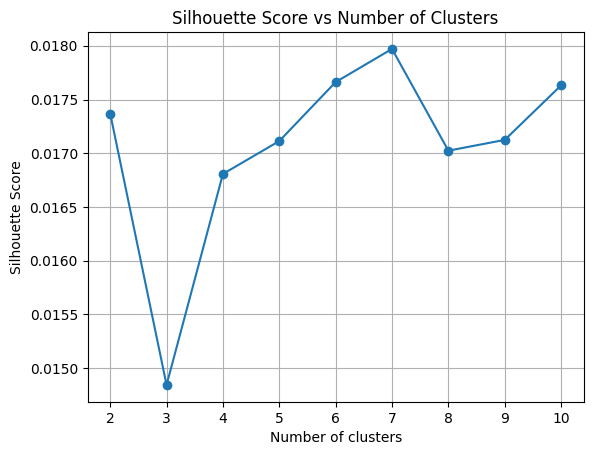

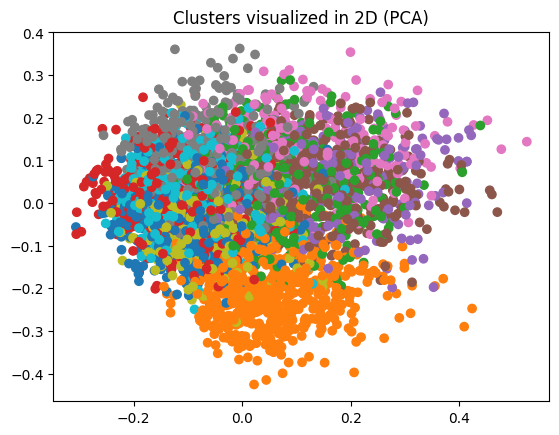

In [71]:
# # !pip install pillow
import ast
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict


all_actions = article_df['Actions'].apply(ast.literal_eval).explode().unique()
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(all_actions, show_progress_bar = True)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# X = embeddings
# k_range = range(1, 15)
# inertia = []


# for k in k_range:
#     kmeans= KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8, 5))
# plt.plot(k_range, inertia, marker='o')
# plt.title('Elbow Method For Optimal K')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS (Inertia)')
# plt.grid(True)
# plt.show()


from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='tab10')
plt.title('Clusters visualized in 2D (PCA)')
plt.show()


In [72]:
num_clusters = 7
kmeans = KMeans(n_clusters = num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

action_to_cluster = dict(zip(all_actions, labels))
cluster_to_action = defaultdict(list)
for action, cluster_id in action_to_cluster.items():
    cluster_to_action[cluster_id].append(action)


for cluster_id, actions in cluster_to_action.items():
    print(f"\n Cluster: {cluster_id}:")
    print(actions)


 Cluster: 5:
['run', 'decide', 'leave', 'survive', 'try', 'end', 'wish', 'lose', 'exist', 'struggle', 'point', 'sue', 'outweigh', 'last', 'explain', 'stop', 'guarantee', 'succeed', 'mean', 'sow', 'affect', 'rule', 'remember', 'dispute', 'prolong', 'fail', 'win', 'lie', 'come', 'happen', 'claim', 'suck', 'cause', 'acknowledge', 'discredit', 'show', 'defy', 'snuff', 'conclude', 'look', 'take', 'see', 'suffer', 'close', 'oust', 'unite', 'refer', 'agree', 'beat', 'appreciate', 'seem', 'tell', 'kill', 'depend', 'promise', 'understand', 'argue', 'hope', 'interpret', 'overwhelm', 'trust', 'think', 'underestimate', 'speak', 'give', 'celebrate', 'imagine', 'feel', 'know', 'favor', 'let', 'rumor', 'die', 'report', 'blame', 'say', 'contradict', 'hit', 'stay', 'respond', 'deem', 'confirm', 'consider', 'urge', 'advise', 'ask', 'remark', 'exact', 'respect', '-', 'imply', 'comment', 'edit', 'quell', 'plan', 'believe', 'ignore', "'Even", 'warn', 'live', "'", 'read', 'change', 'save', 'expect', 'get',

In [73]:
cluster_labels = {
 0: 'Criminal_Actions',
 1: 'Power Struggles',
 2: 'Strategic Governance',
 3: 'Operations & Transactions',
 4: 'Conflict & Control',
 5: 'Crisis & Controversy',
 6: 'Post-Crisis Restoration'  
}

In [74]:
action_to_label = {
    action: cluster_labels[cluster_id]
    for cluster_id, actions in cluster_to_action.items()
    for action in actions
}

In [44]:
!pip install fuzzywuzzy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)


In [75]:
from fuzzywuzzy import process

# Example: cluster_labels is like {0: 'Military', 1: 'Diplomatic', ...}
# event_names = ['TDF retakes Mekelle', 'Joint Eritrean Offensive', ...]


article_to_cluster_label = {
    row.article_id: process.extractOne(row.cleaned_content, cluster_labels.values())[0]
    for row in article_df.itertuples()
}



In [76]:
article_to_cluster_label

{0: 'Power Struggles',
 1: 'Conflict & Control',
 2: 'Operations & Transactions',
 3: 'Power Struggles',
 4: 'Operations & Transactions',
 5: 'Operations & Transactions',
 6: 'Operations & Transactions',
 7: 'Operations & Transactions',
 8: 'Power Struggles',
 9: 'Power Struggles',
 10: 'Strategic Governance',
 11: 'Conflict & Control',
 12: 'Power Struggles',
 13: 'Conflict & Control',
 14: 'Conflict & Control',
 15: 'Strategic Governance',
 16: 'Strategic Governance',
 17: 'Strategic Governance',
 18: 'Conflict & Control',
 19: 'Power Struggles',
 20: 'Power Struggles',
 21: 'Power Struggles',
 22: 'Strategic Governance',
 23: 'Conflict & Control',
 24: 'Crisis & Controversy',
 25: 'Strategic Governance',
 26: 'Conflict & Control',
 27: 'Power Struggles',
 28: 'Power Struggles',
 29: 'Conflict & Control',
 30: 'Conflict & Control',
 31: 'Conflict & Control',
 32: 'Conflict & Control',
 33: 'Conflict & Control',
 34: 'Conflict & Control',
 35: 'Conflict & Control',
 36: 'Conflict & Co

In [77]:
article_to_label

{'article_0': 'Link to Story\n\nIn October, Ethiopian Prime Minister Abiy Ahmed ordered an\xa0offensive against the Tigrayan rebel forces that control much of the country\'s northern Tigray region and part of the neighboring Amhara and Afar regions. His aim was to force the insurgents into a final stand on their home turf, ultimately concluding a yearlong war that has claimed thousands of lives and uprooted more than 1.7 million people. Instead, the gambit appears to have backfired. Not only have Ethiopian troops failed to advance but they have suffered a series of defeats that have left the capital, Addis Ababa, open to attack—forcing Abiy to declare a state of emergency this week and to call on residents to take up arms to defend the city.\n\n\nEven if Abiy\'s military offensive had succeeded, he would have\xa0faced a major challenge in reintegrating Tigray and restoring a sense of national identity. Now that he appears on the brink of failure, however, the prime minister has called 

In [78]:
article_df.columns

Index(['article_id', 'author', 'source', 'Load_Date', 'url', 'title',
       'cleaned_content', 'entities_Group', 'Key_Phrases', 'Actions',
       'final_scores', 'match_Labels', 'major_events', 'best_score',
       'MATCH_LABELS'],
      dtype='object')

In [84]:
article_df['cluster_label'] = article_df['article_id'].map(article_to_cluster_label)


In [85]:
article_df['cluster_label']

0                 Power Struggles
1              Conflict & Control
2       Operations & Transactions
3                 Power Struggles
4       Operations & Transactions
                  ...            
3317              Power Struggles
3318           Conflict & Control
3319         Strategic Governance
3320           Conflict & Control
3321              Power Struggles
Name: cluster_label, Length: 3322, dtype: object

In [99]:
article_df['article_category'] = article_df['article_id'].astype(int).map(article_to_cluster_label)


In [100]:
article_df['article_category']

0                 Power Struggles
1              Conflict & Control
2       Operations & Transactions
3                 Power Struggles
4       Operations & Transactions
                  ...            
3317              Power Struggles
3318           Conflict & Control
3319         Strategic Governance
3320           Conflict & Control
3321              Power Struggles
Name: article_category, Length: 3322, dtype: object

In [101]:
# Check overlap
ids_in_df = set(article_df['article_id'])
ids_in_map = set(article_to_cluster_label.keys())

print("IDs in DF but not in mapping:", len(ids_in_df - ids_in_map))
print("IDs in mapping but not in DF:", len(ids_in_map - ids_in_df))


IDs in DF but not in mapping: 0
IDs in mapping but not in DF: 0


In [102]:
# See a sample of your mapping
list(article_to_cluster_label.items())[:10]


[(0, 'Power Struggles'),
 (1, 'Conflict & Control'),
 (2, 'Operations & Transactions'),
 (3, 'Power Struggles'),
 (4, 'Operations & Transactions'),
 (5, 'Operations & Transactions'),
 (6, 'Operations & Transactions'),
 (7, 'Operations & Transactions'),
 (8, 'Power Struggles'),
 (9, 'Power Struggles')]

In [ ]:

# Build contingency
contingency = pd.crosstab(article_df['cluster_label'], article_df['article_category']) 

# Compute chi2 and expected counts - 
# chi2 = how far the observed count deviates from expected - bigger value > less dominant to the category
# p - probability
# √expected = to scale the residual
# Higher CDI = Higher Bias
# Lower CDI = Low Bias
from scipy.stats import chi2_contingency
import numpy as np

chi2, p, dof, expected = chi2_contingency(contingency)
residuals = (contingency - expected) / np.sqrt(expected)

# Calculate CDI per cluster label
cdi = residuals.abs().mean(axis=1)
print(cdi)

cluster_label
Conflict & Control           12.785945
Criminal_Actions              8.964106
Crisis & Controversy         10.776104
Operations & Transactions    12.568389
Post-Crisis Restoration       9.830392
Power Struggles              13.087593
Strategic Governance         11.998247
dtype: float64
